# Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Create synthetic circular dataset

In [2]:
np.random.seed(0)

theta = np.linspace(0, 2*np.pi, 1000)

x1 = np.cos(theta) + 0.05 * np.random.randn(1000)
x2 = np.sin(theta) + 0.05 * np.random.randn(1000)

X = np.vstack([x1, x2]).T   # shape (1000,2)

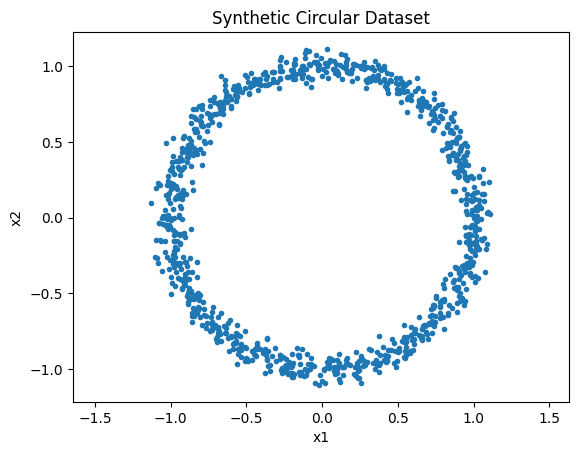

In [3]:
plt.plot(x1,x2,'.')
plt.axis('equal')
plt.title('Synthetic Circular Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Nonlinear autoencoder with tanh
#     2 → 4 → 1 → 4 → 2

### Initialize weights

In [4]:
W1 = np.random.randn(2, 4) * 0.1
b1 = np.zeros(4)

W2 = np.random.randn(4, 1) * 0.1
b2 = np.zeros(1)

W3 = np.random.randn(1, 4) * 0.1
b3 = np.zeros(4)

W4 = np.random.randn(4, 2) * 0.1
b4 = np.zeros(2)

### Activation function:

In [5]:
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1 - np.tanh(x)**2

### Forward pass:

In [6]:
def forward(X):
    z1 = X @ W1 + b1        # (N,4)
    a1 = tanh(z1)

    z2 = a1 @ W2 + b2       # (N,1)
    a2 = tanh(z2)           # latent variable

    z3 = a2 @ W3 + b3       # (N,4)
    a3 = tanh(z3)

    z4 = a3 @ W4 + b4       # (N,2)
    X_hat = z4              # linear output

    return z1, a1, z2, a2, z3, a3, X_hat

### Training:

In [7]:
lr = 0.01
epochs = 3000

for epoch in range(epochs):
    # Forward
    z1, a1, z2, a2, z3, a3, X_hat = forward(X)
    loss = np.mean((X_hat - X)**2)

    # Backprop
    dXhat = 2*(X_hat - X) / len(X)

    dW4 = a3.T @ dXhat
    db4 = dXhat.sum(axis=0)
    da3 = dXhat @ W4.T

    dz3 = da3 * dtanh(z3)
    dW3 = a2.T @ dz3
    db3 = dz3.sum(axis=0)
    da2 = dz3 @ W3.T

    dz2 = da2 * dtanh(z2)
    dW2 = a1.T @ dz2
    db2 = dz2.sum(axis=0)
    da1 = dz2 @ W2.T

    dz1 = da1 * dtanh(z1)
    dW1 = X.T @ dz1
    db1 = dz1.sum(axis=0)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    W4 -= lr * dW4
    b4 -= lr * db4

    if epoch % 400 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")

# ------------------------------------------------------
# Output the latent representation and reconstruction
# ------------------------------------------------------
_, _, _, Z_latent, _, _, X_reconstructed = forward(X)

print("Training complete.")
print("First latent value:", Z_latent[0])
print("First reconstructed point:", X_reconstructed[0])


Epoch 0: Loss = 0.505973
Epoch 400: Loss = 0.505703
Epoch 800: Loss = 0.504865
Epoch 1200: Loss = 0.500759
Epoch 1600: Loss = 0.405077
Epoch 2000: Loss = 0.255090
Epoch 2400: Loss = 0.254610
Epoch 2800: Loss = 0.254229
Training complete.
First latent value: [-0.67660718]
First reconstructed point: [ 9.39125870e-01 -2.58774057e-04]


### Visualize the results:

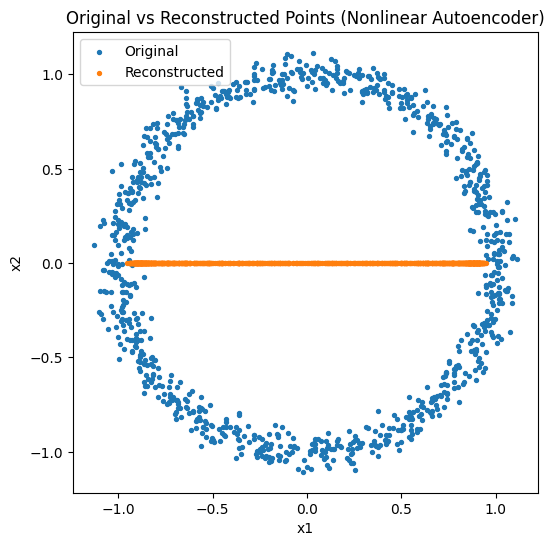

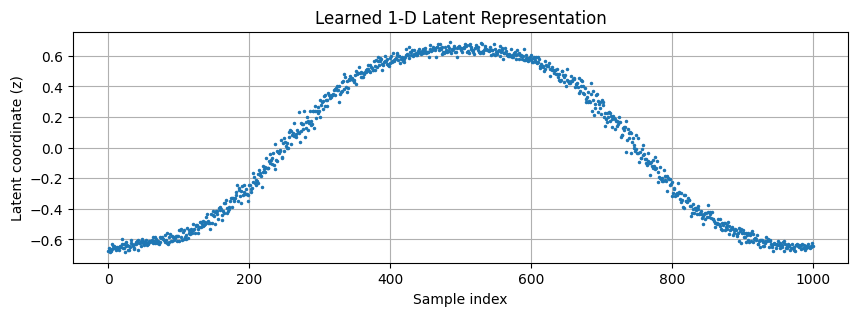

In [8]:
plt.figure(figsize=(6,6))

plt.scatter(X[:,0], X[:,1], s=8, label="Original")
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1], s=8, label="Reconstructed")

plt.title("Original vs Reconstructed Points (Nonlinear Autoencoder)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()

# ------------------------------------------------------
# 2. Plot 1-D latent space Z
# ------------------------------------------------------
plt.figure(figsize=(10,3))

plt.plot(Z_latent[:,0], '.', markersize=3)
plt.title("Learned 1-D Latent Representation")
plt.xlabel("Sample index")
plt.ylabel("Latent coordinate (z)")
plt.grid(True)
plt.show()